# PROJECT 2 

S&P 500 vs Bitcoin





PREPARATION:

In [85]:
# Importing everything that I will need for the project 

import pandas as pd
from pandas import json_normalize

import requests 
import json
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

import importlib
import src.cleaning as cl
importlib.reload(cl)

<module 'src.cleaning' from '/Users/tom/Desktop/Project2/src/cleaning.py'>

In [86]:
#Requesting URL

import requests

url = "https://yfinance-stock-market-data.p.rapidapi.com/stock-info"

payload = "symbol=AAPL"
headers = {
	"content-type": "application/x-www-form-urlencoded",
	"X-RapidAPI-Key": "40d3a7f43cmshb0c6326b8f21b2cp1f3f76jsn6989f38dacf4",
	"X-RapidAPI-Host": "yfinance-stock-market-data.p.rapidapi.com"
}

response = requests.request("POST", url, data=payload, headers=headers)

print(response.text)

{"message":"You are not subscribed to this API."}


The yahoo finance is subscription only but it is very popular so there is a library available with the same information

In [87]:
# Importing Yahoo Finance 
import yfinance as yf

#Importing cleanining as cl 
import src.cleaning as cl

# Importing the data for the S&p500 for the required datafram into a dataframe and printing the head
df = cl.importing()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-04-29 00:00:00-04:00,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0
1,2013-04-30 00:00:00-04:00,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0
2,2013-05-01 00:00:00-04:00,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0
3,2013-05-02 00:00:00-04:00,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0
4,2013-05-03 00:00:00-04:00,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0
...,...,...,...,...,...,...,...,...
2056,2021-06-28 00:00:00-04:00,4284.899902,4292.140137,4274.669922,4290.609863,4147890000,0.0,0.0
2057,2021-06-29 00:00:00-04:00,4293.209961,4300.520020,4287.040039,4291.799805,3707150000,0.0,0.0
2058,2021-06-30 00:00:00-04:00,4290.649902,4302.430176,4287.959961,4297.500000,4266040000,0.0,0.0
2059,2021-07-01 00:00:00-04:00,4300.729980,4320.660156,4300.729980,4319.939941,3788230000,0.0,0.0


In [88]:
#Printing the names of the columns in DF
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [89]:
#Getting the info for DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2061 non-null   object 
 1   Open          2061 non-null   float64
 2   High          2061 non-null   float64
 3   Low           2061 non-null   float64
 4   Close         2061 non-null   float64
 5   Volume        2061 non-null   int64  
 6   Dividends     2061 non-null   float64
 7   Stock Splits  2061 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 128.9+ KB


In [90]:
df2 = cl.importcsv()
df2.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [91]:
# Importing the data from the Bitcoin csv file into a dataframe (df2) and printing the head
df2 = pd.read_csv("/Users/tom/desktop/Project2/coin_Bitcoin.csv")
df2.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [92]:
#Getting the info for the Bitcoin dataframe 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


CLEANING:

In [93]:
# Converting 'Date' column to datetime type in df with my datecleaner function
cl.datecleaner(df)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-04-29,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0
1,2013-04-30,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0
2,2013-05-01,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0
3,2013-05-02,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0
4,2013-05-03,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0
...,...,...,...,...,...,...,...,...
2056,2021-06-28,4284.899902,4292.140137,4274.669922,4290.609863,4147890000,0.0,0.0
2057,2021-06-29,4293.209961,4300.520020,4287.040039,4291.799805,3707150000,0.0,0.0
2058,2021-06-30,4290.649902,4302.430176,4287.959961,4297.500000,4266040000,0.0,0.0
2059,2021-07-01,4300.729980,4320.660156,4300.729980,4319.939941,3788230000,0.0,0.0


In [94]:
#Keeping only relevant columns with my column cleaner function 
cl.columncleaner(df)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-04-29,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0
1,2013-04-30,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0
2,2013-05-01,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0
3,2013-05-02,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0
4,2013-05-03,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0
...,...,...,...,...,...,...,...,...
2056,2021-06-28,4284.899902,4292.140137,4274.669922,4290.609863,4147890000,0.0,0.0
2057,2021-06-29,4293.209961,4300.520020,4287.040039,4291.799805,3707150000,0.0,0.0
2058,2021-06-30,4290.649902,4302.430176,4287.959961,4297.500000,4266040000,0.0,0.0
2059,2021-07-01,4300.729980,4320.660156,4300.729980,4319.939941,3788230000,0.0,0.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2061 non-null   object 
 1   Open          2061 non-null   float64
 2   High          2061 non-null   float64
 3   Low           2061 non-null   float64
 4   Close         2061 non-null   float64
 5   Volume        2061 non-null   int64  
 6   Dividends     2061 non-null   float64
 7   Stock Splits  2061 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 128.9+ KB


In [96]:
# Converting 'Date' column to datetime type in df2 with my datecleaner function
cl.datecleaner(df2)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [97]:
#Keeping only relevant columns in df2 with my column cleaner function 
cl.columncleaner(df2)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2061 non-null   object 
 1   Open          2061 non-null   float64
 2   High          2061 non-null   float64
 3   Low           2061 non-null   float64
 4   Close         2061 non-null   float64
 5   Volume        2061 non-null   int64  
 6   Dividends     2061 non-null   float64
 7   Stock Splits  2061 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 128.9+ KB


In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [100]:
# Checking the keys of the dataframes before merging
print("df keys:", df.keys())
print("df2 keys:", df2.keys())

df keys: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
df2 keys: Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')


In [101]:
#Checking the datatypes of the column before merging
print("df keys type:", df.dtypes)
print("df2 keys type:", df2.dtypes)

df keys type: Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
df2 keys type: SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object


In [102]:
#Merging the dataframes
df_merged = pd.merge(df, df2, on='Date')
df_merged.set_index('Date', inplace=True)
df_merged['Month'] = df_merged.index
df_merged['Year'] = df_merged.index
df_merged.head()

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends,Stock Splits,SNo,Name,Symbol,High_y,Low_y,Open_y,Close_y,Volume_y,Marketcap,Month,Year
Date,,,,,,,,,,,,,,,,,,
2013-04-29,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29,2013-04-29
2013-04-30,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30,2013-04-30
2013-05-01,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01,2013-05-01
2013-05-02,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02,2013-05-02
2013-05-03,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03,2013-05-03


In [103]:
#Converting Month and Year columns into strings (so that i can split them)
df_merged["Month"] = df_merged["Month"].astype(str)
df_merged["Year"] = df_merged["Year"].astype(str)

In [104]:
#Extracting the month and year componenets of the date string for their respective columns
df_merged['Month'] = df_merged['Month'].apply(lambda x: x.split("-")[1])
df_merged['Year'] = df_merged['Year'].apply(lambda x: x.split("-")[0])

In [105]:
df_merged.head()

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends,Stock Splits,SNo,Name,Symbol,High_y,Low_y,Open_y,Close_y,Volume_y,Marketcap,Month,Year
Date,,,,,,,,,,,,,,,,,,
2013-04-29,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,04,2013
2013-04-30,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,04,2013
2013-05-01,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,05,2013
2013-05-02,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,05,2013
2013-05-03,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,05,2013


In [106]:
#Giving the month values proper names

month_map = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

df_merged['Month'] = df_merged['Month'].map(month_map)
df_merged.head()

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends,Stock Splits,SNo,Name,Symbol,High_y,Low_y,Open_y,Close_y,Volume_y,Marketcap,Month,Year
Date,,,,,,,,,,,,,,,,,,
2013-04-29,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,April,2013
2013-04-30,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,April,2013
2013-05-01,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,May,2013
2013-05-02,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,May,2013
2013-05-03,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,May,2013


In [107]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 2013-04-29 to 2021-07-02
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_x        2061 non-null   float64
 1   High_x        2061 non-null   float64
 2   Low_x         2061 non-null   float64
 3   Close_x       2061 non-null   float64
 4   Volume_x      2061 non-null   int64  
 5   Dividends     2061 non-null   float64
 6   Stock Splits  2061 non-null   float64
 7   SNo           2061 non-null   int64  
 8   Name          2061 non-null   object 
 9   Symbol        2061 non-null   object 
 10  High_y        2061 non-null   float64
 11  Low_y         2061 non-null   float64
 12  Open_y        2061 non-null   float64
 13  Close_y       2061 non-null   float64
 14  Volume_y      2061 non-null   float64
 15  Marketcap     2061 non-null   float64
 16  Month         2061 non-null   object 
 17  Year          2061 non-null   object 
dtypes: float64(12), in

In [108]:
df_merged.rename(columns={'Open_x': 'Open_SP500',
                          'High_x': 'High_SP500',
                          'Low_x': 'Low_SP500',
                          'Close_x': 'Close_SP500',
                          'Open_y': 'Open_Bitcoin',
                          'High_y': 'High_Bitcoin',
                          'Low_y': 'Low_Bitcoin',
                          'Close_y': 'Close_Bitcoin'}, inplace=True)
df_merged.head()

,Open_SP500,High_SP500,Low_SP500,Close_SP500,Volume_x,Dividends,Stock Splits,SNo,Name,Symbol,High_Bitcoin,Low_Bitcoin,Open_Bitcoin,Close_Bitcoin,Volume_y,Marketcap,Month,Year
Date,,,,,,,,,,,,,,,,,,
2013-04-29,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,April,2013
2013-04-30,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,April,2013
2013-05-01,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,May,2013
2013-05-02,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,May,2013
2013-05-03,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,May,2013


In [109]:
#Checking the shape of ther merged dataframe
df_merged.shape

(2061, 18)

In [110]:
#Checking the final cleaned merged dataframe
df_merged.head()

,Open_SP500,High_SP500,Low_SP500,Close_SP500,Volume_x,Dividends,Stock Splits,SNo,Name,Symbol,High_Bitcoin,Low_Bitcoin,Open_Bitcoin,Close_Bitcoin,Volume_y,Marketcap,Month,Year
Date,,,,,,,,,,,,,,,,,,
2013-04-29,1582.339966,1596.650024,1582.339966,1593.609985,2891200000,0.0,0.0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,April,2013
2013-04-30,1593.579956,1597.569946,1586.500000,1597.569946,3745070000,0.0,0.0,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,April,2013
2013-05-01,1597.550049,1597.550049,1581.280029,1582.699951,3530320000,0.0,0.0,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,May,2013
2013-05-02,1582.770020,1598.599976,1582.770020,1597.589966,3366950000,0.0,0.0,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,May,2013
2013-05-03,1597.599976,1618.459961,1597.599976,1614.420044,3603910000,0.0,0.0,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,May,2013


DATA EXPLORATION & VISUALISATION: 

In [111]:
#Calculating the correlation between the two assets
correlation = df_merged['Close_SP500'].corr(df_merged['Close_Bitcoin'])
print('Correlation between the two assets:', correlation)

Correlation between the two assets: 0.8286576817530696


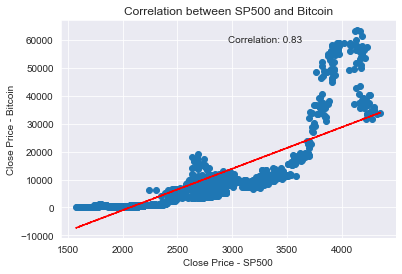

In [112]:
#Creating a scatterplot of the two assets
plt.scatter(df_merged['Close_SP500'], df_merged['Close_Bitcoin'])

#Adding labels and title to the plot
plt.xlabel('Close Price - SP500')
plt.ylabel('Close Price - Bitcoin')
plt.title('Correlation between SP500 and Bitcoin')

#Adding a trendline to the scatterplot
z = np.polyfit(df_merged['Close_SP500'], df_merged['Close_Bitcoin'], 1)
p = np.poly1d(z)
plt.plot(df_merged['Close_SP500'], p(df_merged['Close_SP500']), 'r--')

#Adding the correlation coefficient to the plot
plt.text(0.5, 0.9, 'Correlation: {:.2f}'.format(correlation), transform=plt.gca().transAxes)
plt.savefig("images/Correlation_between_SP500_and_Bitcoin")

plt.show()

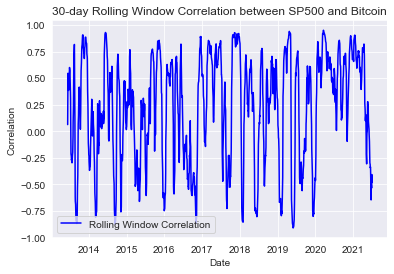

In [113]:
#Line plot showing 30 day rolling correlation

# Calculate the rolling window correlation of the two assets
window = 30
rolling_correlation = df_merged['Close_SP500'].rolling(window=window).corr(df_merged['Close_Bitcoin'])

# Plot the rolling window correlation
plt.plot(rolling_correlation, color='blue', label='Rolling Window Correlation')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title(f'{window}-day Rolling Window Correlation between SP500 and Bitcoin')
plt.legend()

plt.savefig("images/30Day_Rolling_Correlation_between_SP500_and_Bitcoin")
plt.show()

This visualization shows the changes in the correlation between the two assets over time, making it easier to see the trend and fluctuations in the correlation. Using a 30 day window, the correlation changes a lot so I will use a 90 day window to create a smoother plot

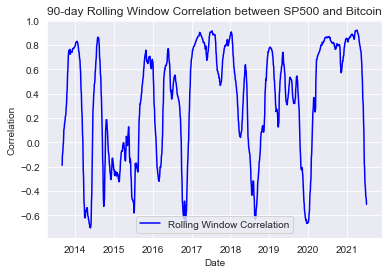

In [114]:
#Line plot showing 90 day rolling correlation

# Calculate the rolling window correlation of the two assets
window = 90
rolling_correlation = df_merged['Close_SP500'].rolling(window=window).corr(df_merged['Close_Bitcoin'])

# Plot the rolling window correlation
plt.plot(rolling_correlation, color='blue', label='Rolling Window Correlation')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title(f'{window}-day Rolling Window Correlation between SP500 and Bitcoin')
plt.legend()

plt.savefig("images/90Day_Rolling_Correlation_between_SP500_and_Bitcoin")
plt.show()

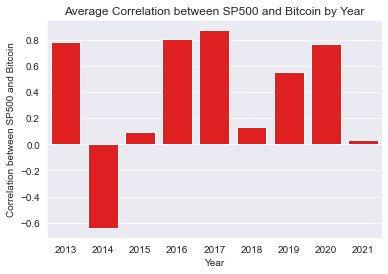

In [115]:
#Bar chart to show the average correlation by year

#Group the data by year and calculate the average correlation for each year
grouped = df_merged.groupby('Year').apply(lambda x: x['Close_SP500'].corr(x['Close_Bitcoin']))

#Plot the correlation by year
sns.barplot(x=grouped.index, y=grouped.values, color='red')

#Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Correlation between SP500 and Bitcoin')
plt.title('Average Correlation between SP500 and Bitcoin by Year')

plt.savefig("images/Average_Correlation_between_SP500_and_Bitcoin_by_Year")
plt.show()


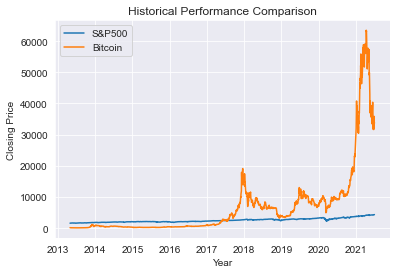

In [116]:
#Historical Performance Comparison:
# Ploting the closing prices of both assets over time
plt.plot(df_merged['Close_SP500'], label='S&P500')
plt.plot(df_merged['Close_Bitcoin'], label='Bitcoin')
plt.legend()
plt.title("Historical Performance Comparison")
plt.xlabel("Year")
plt.ylabel("Closing Price")

plt.savefig("images/Historical_Performance_Comparison")
plt.show()

Comparing the Volatility of the 2 Assets Over Time:
To compare the volatility of the S&P500 and Bitcoin, we can plot the rolling standard deviation of their daily returns. This will give us a visual representation of the fluctuation in their returns over time.

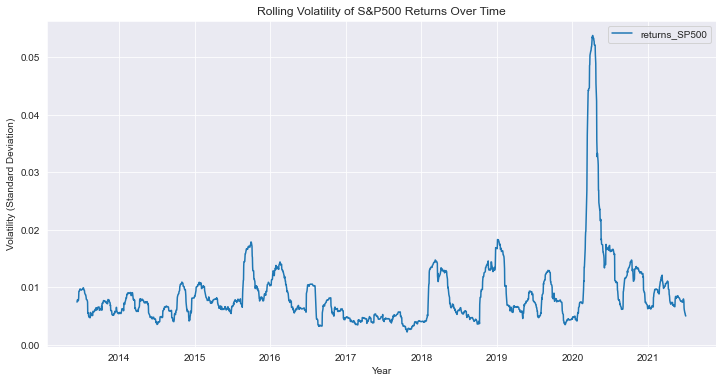

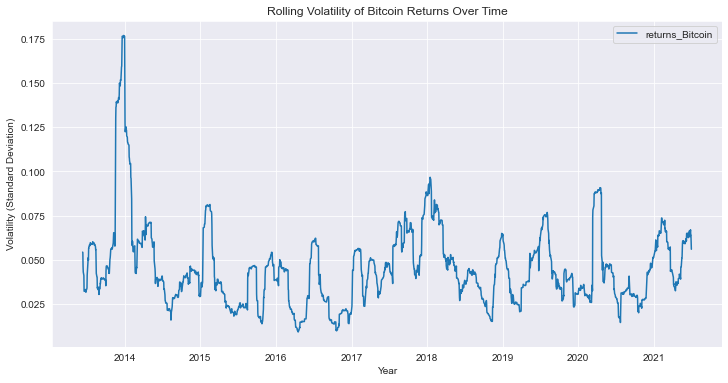

<Figure size 432x288 with 0 Axes>

In [117]:
def plot_rolling_std(df, col, title):
    plt.figure(figsize=(12, 6))
    sns.set_style('darkgrid')
    sns.lineplot(data=df[col].rolling(window=30).std(), label=col)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Volatility (Standard Deviation)')
    plt.show()

# Calculate the daily returns of S&P500 and Bitcoin
df_merged['returns_SP500'] = df_merged['Close_SP500'].pct_change()
df_merged['returns_Bitcoin'] = df_merged['Close_Bitcoin'].pct_change()

# Plot the rolling standard deviation of daily returns for S&P500 and Bitcoin
plot_rolling_std(df_merged, 'returns_SP500', 'Rolling Volatility of S&P500 Returns Over Time')
plot_rolling_std(df_merged, 'returns_Bitcoin', 'Rolling Volatility of Bitcoin Returns Over Time')


plt.savefig("images/Rolling_Volatility_of_Returns")

plt.show()

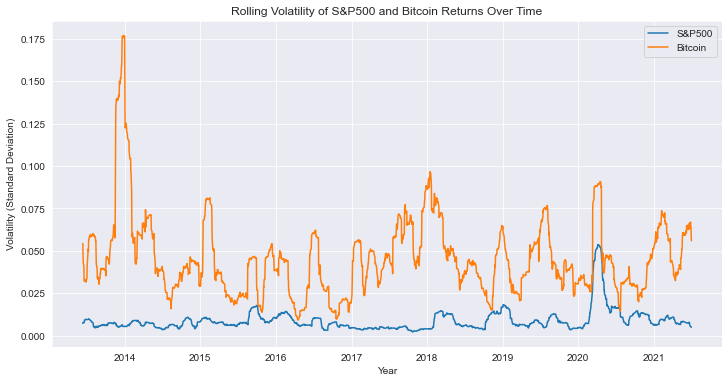

In [118]:
def plot_rolling_std(df, title):
    plt.figure(figsize=(12, 6))
    sns.set_style('darkgrid')
    sns.lineplot(data=df['returns_SP500'].rolling(window=30).std(), label='S&P500')
    sns.lineplot(data=df['returns_Bitcoin'].rolling(window=30).std(), label='Bitcoin')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Volatility (Standard Deviation)')
    plt.legend()
 

# Plot the rolling standard deviation of daily returns for both S&P500 and Bitcoin
plot_rolling_std(df_merged, 'Rolling Volatility of S&P500 and Bitcoin Returns Over Time')
plt.savefig("images/Rolling_Volatility_of_Returns_Overlayed")

plt.show()

Design a Portfolio of Crypto (Bitcoin) and Stocks (S&P 500)

To calculate the optimal investment portfolio weighting between S&P500 and bitcoin based on the risk adjutsed returnns we need to calculate the Sharpe ratio for both assets. 

In [119]:
def sharpe_ratio(returns, risk_free_rate, period=252):
    return (np.mean(returns - risk_free_rate) * period) / (np.std(returns) * np.sqrt(period))

sp500_returns = df_merged['Close_SP500'].pct_change()
bitcoin_returns = df_merged['Close_Bitcoin'].pct_change()

risk_free_rate = 0.0 # Assuming the risk-free rate is 0%

sp500_sharpe_ratio = sharpe_ratio(sp500_returns, risk_free_rate)
bitcoin_sharpe_ratio = sharpe_ratio(bitcoin_returns, risk_free_rate)

In [120]:
sp500_sharpe_ratio

0.8053284858988468

In [121]:
bitcoin_sharpe_ratio

1.2174884988061467

With the Sharpe ratio values for both assets, we can plot a pie chart to compare the Sharpe ratios and visualize the suggested investment portfolio weighting:

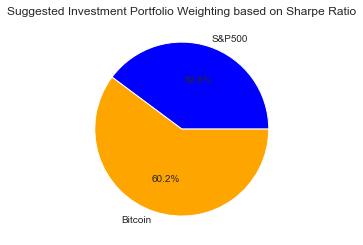

In [122]:

weights = [sp500_sharpe_ratio / (sp500_sharpe_ratio + bitcoin_sharpe_ratio),
           bitcoin_sharpe_ratio / (sp500_sharpe_ratio + bitcoin_sharpe_ratio)]

plt.pie(weights, labels=['S&P500', 'Bitcoin'], colors=['blue', 'orange'], autopct='%1.1f%%')
plt.title('Suggested Investment Portfolio Weighting based on Sharpe Ratio')


plt.savefig("images/Investment_Portfolio")
plt.show()
